In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
# importing sys
import itertools
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '/home/sanj/projects/gaardian/workflow/scripts/')
import probetools as probe
import scipy.stats

### Fst analyses - GAARDIAN

#### Load data

In [6]:
sample_set = "1244-VO-GH-YAWSON-VMF00149"
contigs = ['2L', '2R', '3L', '3R', 'X']

In [43]:
metadata = pd.read_csv("../../config/metadata.tsv", sep="\t", index_col=0)

snps = {}
pos = {}

for contig in contigs:
    
    snps[contig], pos[contig] = probe.loadZarrArrays(genotypePath=f"../../resources/snp_genotypes/all/1244-VO-GH-YAWSON-VMF00149/{contig}/calldata/GT/", 
                                        positionsPath=f"../../resources/snp_genotypes/all/sites/{contig}/variants/POS/",
                                        siteFilterPath=f"../../resources/site_filters/dt_20200416/gamb_colu/{contig}/variants/filter_pass/")


In [44]:
metadata.head(2)

,sample_id,partner_sample_id,contributor,country,location,location2,year,month,latitude,longitude,sex_call,species_gambiae_coluzzii,District,Ecology,mining,IRS STATUS
0,VBS45187-5563STDY8782450,WA-2001,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.A,2018,3,6.304,-1.681,F,gambiae,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS
1,VBS45188-5563STDY8782451,WA-2002,Alexander Egyir-Yawson,Ghana,Adumanu,Adumanu.House.C,2018,10,6.302,-1.682,F,coluzzii,Adansi North,"Forest, farming, Illegal mining open pits",mining,Non-IRS


#### Calculate Fst, location v location - coluzzii

In [137]:
chrom = '3L'
metadata.species_gambiae_coluzzii.value_counts()

coluzzii    422
gambiae      63
Name: species_gambiae_coluzzii, dtype: int64

In [8]:
coluzzii_bool = metadata.species_gambiae_coluzzii == 'coluzzii'
geno = snps[chrom].compress(coluzzii_bool, axis=1)
meta = metadata[coluzzii_bool]

In [10]:
seg = geno.count_alleles().is_segregating()
geno = geno.compress(seg, axis=0)

In [11]:
pos1 = pos[chrom][seg]

In [12]:
geno.shape

(6445299, 422, 2)

In [13]:
pos1.shape

(6445299,)

### An. coluzzii Fst location v location

In [15]:
loc_ac = {}

for loc in meta['location'].unique():

    loc_bool = meta.location2 == loc
    if loc_bool.sum() < 11:
        continue
    
    print(loc)
    nmeta = meta[loc_bool]

    loc_ac[loc] = geno.compress(loc_bool, axis=1).count_alleles()    

Adumanu
Kente
Odumto
Watreso
Adansi-Krom
Ankaako
Koniyaw
Kokotro
Anhwiaso
Anwona
Fumso
New Edubiase
Adansi Apagya
Wamase
Yadome
Annorkrom
Prisintease
Pokukrom
Nkotumso
Domenase
Bogyawe
Subin Camp
Mprakyire
Jacobu
Dompoase


In [16]:
meta_locs = meta.groupby('location2').agg({'latitude':'mean', 'longitude':'mean'})

In [18]:
x_list = []
y_list = []

fst_list = []
km_list = []


for x,y in itertools.combinations(loc_ac.keys(), 2):

    x_list.append(x)
    y_list.append(y)

    fst, se, _, _ = allel.average_hudson_fst(loc_ac[x], loc_ac[y], blen=1000000)        
    fst_list.append(fst)
   
    a = meta_locs[meta_locs.index == x].to_numpy()[0]
    b= meta_locs[meta_locs.index == y].to_numpy()[0]
    
    km = geopy.distance.geodesic(a, b).km
    km_list.append(km)
    
    print(x, y, km, fst)

km_fst_df = pd.DataFrame({'loc1':x_list, 'loc2': y_list, 'km':km_list, 'fst':fst_list})
km_fst_df.to_csv("km_fst_df.csv")

Kente Odumto 6.661472425983306 0.0007039974238500764
Kente Watreso 13.78808341940896 7.066473705650134e-05
Kente Ankaako 13.707964334356387 0.0006084680896198571


KeyboardInterrupt: 

#### An. coluzzii Fst individual sample v sample

In [5]:
#ind_ac = {}#

#with ProgressBar():
 #   for ind in meta.partner_sample_id.unique():
#
 #       ind_bool = meta.partner_sample_id == ind
 #       nmeta = meta[ind_bool]
#
 #       ind_ac[ind] = geno.compress(ind_bool, axis=1).count_alleles()    

### Load Fst data and apply regression and plot

/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

20
LinregressResult(slope=933.2630196890293, intercept=3.147400001119399, rvalue=0.3936171692797341, pvalue=0.00747064574450972, stderr=332.3846719634719, intercept_stderr=0.1442823379898642)


15
LinregressResult(slope=534.164425042623, intercept=3.2386370111363214, rvalue=0.3948687968422215, pvalue=0.0003467205783922607, stderr=142.56299211625208, intercept_stderr=0.08990043875279152)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

10
LinregressResult(slope=341.345992145492, intercept=3.260717597078185, rvalue=0.2713689893392551, pvalue=0.005107638282236823, stderr=119.29043190301135, intercept_stderr=0.0829717596448777)


8
LinregressResult(slope=294.0447110568155, intercept=3.3032863946760984, rvalue=0.2551236008571481, pvalue=0.004920701549998522, stderr=102.59048610738519, intercept_stderr=0.0677661726825446)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


6
LinregressResult(slope=223.54761969860223, intercept=3.27139280413918, rvalue=0.211371124209208, pvalue=0.005516954937778112, stderr=79.51626754129563, intercept_stderr=0.05497151872028938)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


4
LinregressResult(slope=23.116031579785485, intercept=3.3794009408029084, rvalue=0.04317480134620521, pvalue=0.5137917475476312, stderr=35.34760847909775, intercept_stderr=0.03860119033027553)


2
LinregressResult(slope=6.722066250881443, intercept=3.3818665405072736, rvalue=0.0174312515216699, pvalue=0.7636580865882149, stderr=22.33572721640903, intercept_stderr=0.033588534698208605)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


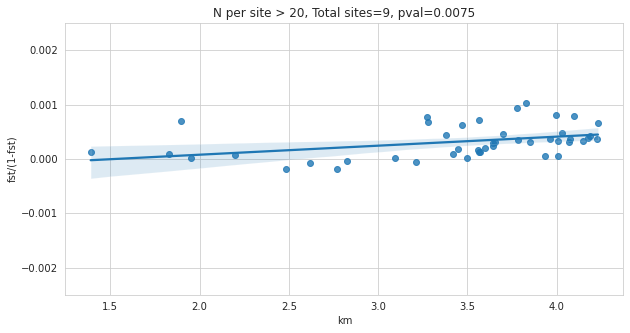

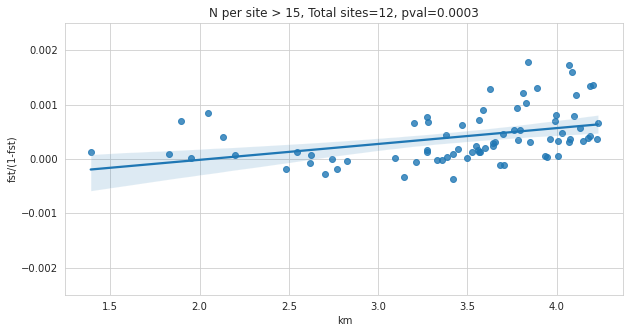

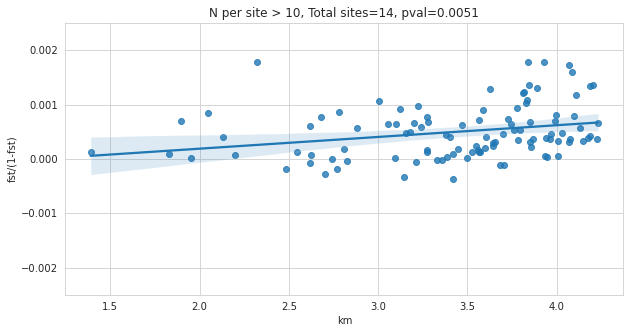

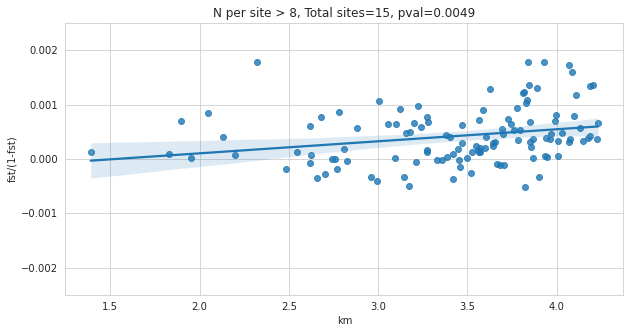

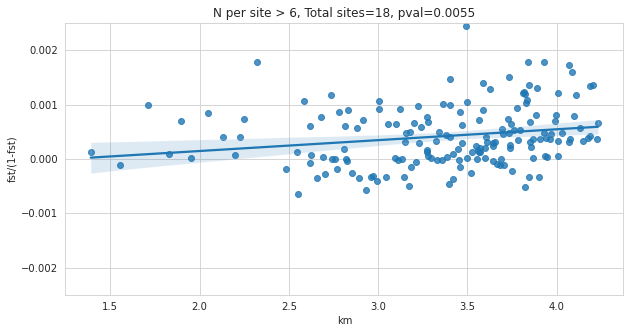

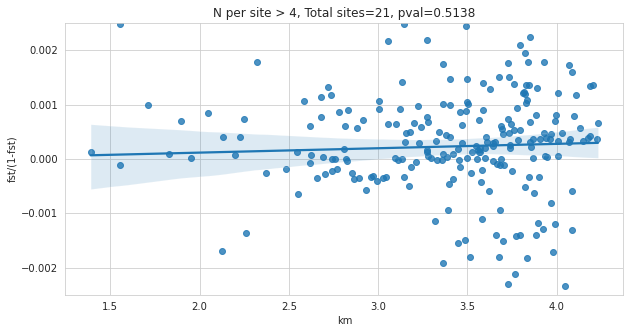

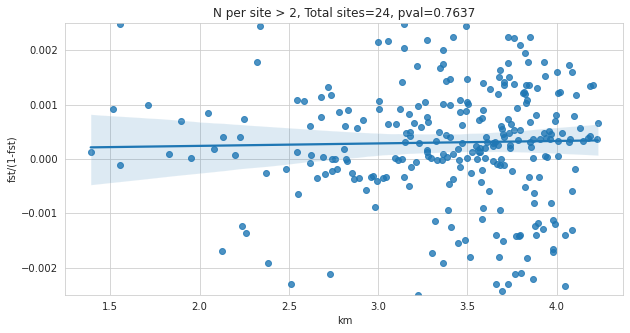

In [136]:
sns.set_style("whitegrid")
fst_km = pd.read_csv("../../results/spatial/Fst_fm_coluzzii.tsv", index_col=0, sep="\t")

for limit in [20,15,10,8,6,4,2]:
    remove_locs = np.array(metadata.location.value_counts()[metadata.location.value_counts() < limit].index)
    fst_km2 = fst_km[~fst_km['loc1'].isin(remove_locs)]
    fst_km3 = fst_km2[~fst_km2['loc2'].isin(remove_locs)]
    
    fst_km3['fst/(1-fst)'] = fst_km3['fst']/(1-fst_km3['fst'])
    res = scipy.stats.linregress(fst_km3['fst/(1-fst)'], np.log(fst_km3['km']))
    print(limit)
    print(res)
    print("\n")
    
    plt.figure(figsize=[10,5])
    plt.ylim(-0.0025, 0.0025)
    plt.title(f"N per site > {limit}, Total sites={len(fst_km3.loc1.unique())}, pval={np.round(res.pvalue, 4)}")
    sns.regplot(np.log(fst_km3['km']), fst_km3['fst/(1-fst)'])

### Within and outside gold mine Fst 

In [143]:
fst_km = pd.read_csv("../../results/spatial/Fst_fm_coluzzii.tsv", index_col=0, sep="\t")
meta = metadata[['location', 'mining']]
meta['loc1'] = meta['location']

fst_km = fst_km.merge(meta)
meta['loc2'] = meta['loc1']

fst_km = fst_km.merge(meta, on='loc2').drop_duplicates()

/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

20
LinregressResult(slope=9207.821054742342, intercept=1.020123631158329, rvalue=0.6976883077449013, pvalue=0.5084241156197119, stderr=9454.789771476659, intercept_stderr=2.0421102892031544)


15
LinregressResult(slope=526.806372488345, intercept=2.712287683687762, rvalue=0.3139949208082011, pvalue=0.5444864396178574, stderr=796.4507213994295, intercept_stderr=0.6763799065898761)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

10
LinregressResult(slope=526.806372488345, intercept=2.712287683687762, rvalue=0.3139949208082011, pvalue=0.5444864396178574, stderr=796.4507213994295, intercept_stderr=0.6763799065898761)


8
LinregressResult(slope=320.02076359829954, intercept=2.9863865256147957, rvalue=0.24420262207689178, pvalue=0.49653966157794693, stderr=449.2944846787278, intercept_stderr=0.30488328312060936)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

6
LinregressResult(slope=320.02076359829954, intercept=2.9863865256147957, rvalue=0.24420262207689178, pvalue=0.49653966157794693, stderr=449.2944846787278, intercept_stderr=0.30488328312060936)


4
LinregressResult(slope=72.57820935226638, intercept=3.094114441230981, rvalue=0.17172932944149863, pvalue=0.45667624413339636, stderr=95.51790015504922, intercept_stderr=0.17693724831009947)




/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sanj/apps/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2
LinregressResult(slope=17.53877351387149, intercept=3.0051097840070056, rvalue=0.054939615260606506, pvalue=0.7200094900020214, stderr=48.60970196622908, intercept_stderr=0.10226387894706142)




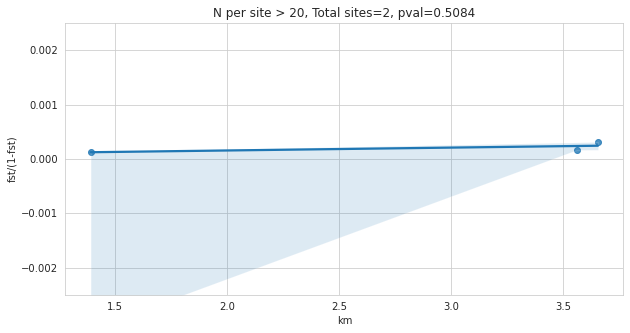

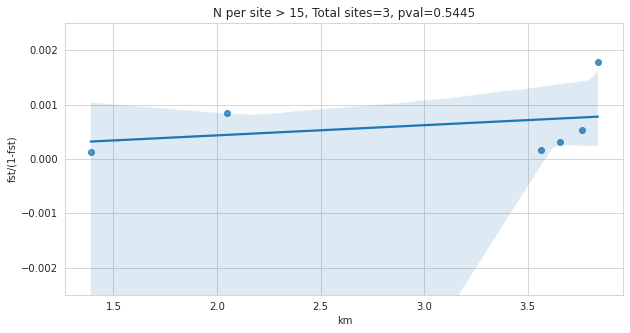

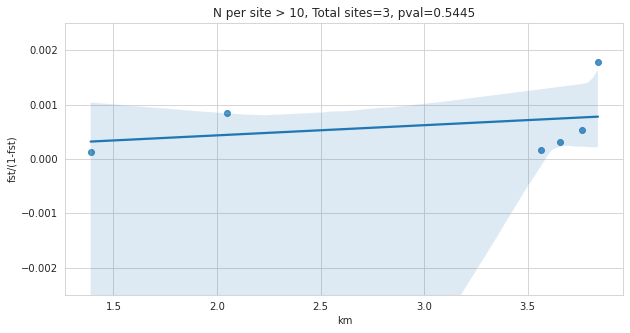

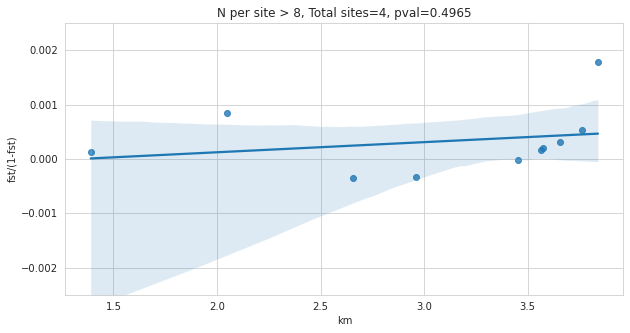

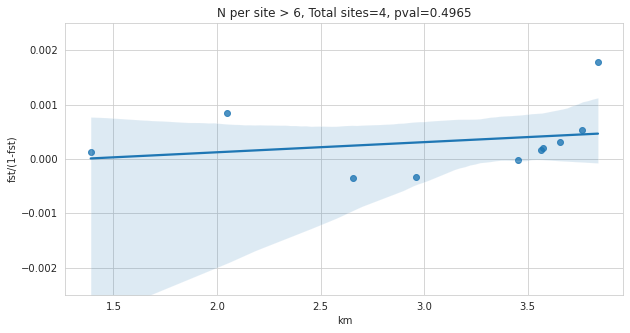

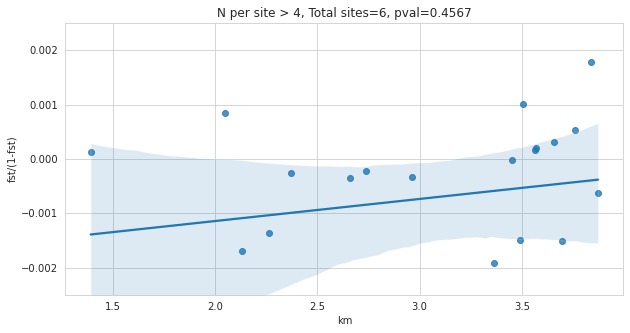

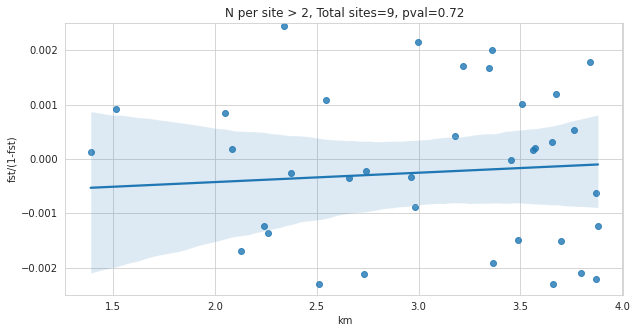

In [145]:
fst_km = fst_km.query("mining_x == 'mining' & mining_y == 'mining'")

for limit in [20,15,10,8,6,4,2]:
    remove_locs = np.array(metadata.location.value_counts()[metadata.location.value_counts() < limit].index)
    fst_km2 = fst_km[~fst_km['loc1_x'].isin(remove_locs)]
    fst_km3 = fst_km2[~fst_km2['loc2'].isin(remove_locs)]
    
    fst_km3['fst/(1-fst)'] = fst_km3['fst']/(1-fst_km3['fst'])
    res = scipy.stats.linregress(fst_km3['fst/(1-fst)'], np.log(fst_km3['km']))
    print(limit)
    print(res)
    print("\n")
    
    plt.figure(figsize=[10,5])
    plt.ylim(-0.0025, 0.0025)
    plt.title(f"N per site > {limit}, Total sites={len(fst_km3.loc1_x.unique())}, pval={np.round(res.pvalue, 4)}")
    sns.regplot(np.log(fst_km3['km']), fst_km3['fst/(1-fst)'])